In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import plotly.express as px

In [2]:
df = pd.read_csv('ResultaDatawithAuthorDetails.csv')
df.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,retweet,retweet_frequency,start_date,end_date,time_span,how many countries,countries and retweeted times,how many females/males,Author,Name,Country,State/Region,City/Urban Area,Category,Gender,Posts,Followers,Following
0,0,idris elba says the #metoo movement is “only ...,4004,12/17/18 16:03,1/15/19 21:10,29 days 05:06:41,69,"Antigua and Barbuda:1, Argentina:13, Australia...","F:1274, M:748",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,long before #metoo became the catalyst for a ...,3067,11/28/18 14:01,1/10/19 10:00,42 days 19:59:25,46,"Antarctica:1, Australia:23, Azerbaijan:1, Belg...","F:942, M:672",@eileenmurphy11,Eileen Murphy,NaN,NaN,NaN,Neutral,F,1640.0,73.0,153.0
2,2,i just sent out a tweet. started #metoo over...,1797,12/23/18 0:01,1/7/19 6:36,15 days 06:35:05,38,"Argentina:1, Australia:15, Austria:1, Barbados...","F:641, M:339",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,minnesota professor says the virgin mary didn...,1644,12/7/18 11:11,1/3/19 20:26,27 days 09:15:02,46,"Argentina:4, Australia:16, Brazil:10, Canada:5...","F:328, M:524",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"in #metoo era, at least 4 democrats elected d...",1543,11/7/18 15:23,1/4/19 15:45,58 days 00:22:05,29,"Andorra:1, Argentina:1, Australia:4, Brazil:3,...","F:417, M:443",@KarenMy89957831,Karen Myers,NaN,NaN,NaN,Negative,F,13203.0,3990.0,4234.0


In [3]:
df.dtypes

Unnamed: 0                         int64
retweet                           object
retweet_frequency                  int64
start_date                        object
end_date                          object
time_span                         object
how many countries                 int64
countries and retweeted times     object
how many females/males            object
Author                            object
Name                              object
Country                           object
State/Region                      object
City/Urban Area                   object
Category                          object
Gender                            object
Posts                            float64
Followers                        float64
Following                        float64
dtype: object

In [0]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Total number of Rows and Columns in dataset
df.shape

(41864, 18)

In [6]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicated rows: ', duplicate_rows_df)

Number of duplicated rows:                                                   retweet  ...  Following
18145   hey #metoo   and  "want to debate issues that...  ...        NaN
18663    here's more on how this sisterhood circle is...  ...        NaN
18938   read supreme couwrit petition 1027/2018 again...  ...        NaN
19352   sardar statue, #metoo and traffic ruled onlin...  ...       15.0
20580   has the #metoo movement ruined online dating?...  ...    10927.0
20581   has the #metoo movement ruined online dating?...  ...    10927.0
20582   has the #metoo movement ruined online dating?...  ...    10927.0
20583   has the #metoo movement ruined online dating?...  ...    10927.0
20584   has the #metoo movement ruined online dating?...  ...    10927.0
20585   has the #metoo movement ruined online dating?...  ...    10927.0
20708   "you can do it ,but i can not do it" i also g...  ...     1793.0
21096   #thisisu have self respect #walkaway #fbr #re...  ...        NaN
21791   i #resist hate 

In [7]:
# Finding null values
print(df.isnull().sum())

retweet                              0
retweet_frequency                    0
start_date                           0
end_date                             0
time_span                            0
how many countries                   0
countries and retweeted times    11239
how many females/males           14830
Author                           26552
Name                             26530
Country                          33080
State/Region                     35474
City/Urban Area                  36980
Category                         26529
Gender                           34225
Posts                            26552
Followers                        26552
Following                        26552
dtype: int64


In [8]:
# splitting data based on author details
retweets_with_author_details = df[df['Author'].notnull()]
retweets_with_author_details

,retweet,retweet_frequency,start_date,end_date,time_span,how many countries,countries and retweeted times,how many females/males,Author,Name,Country,State/Region,City/Urban Area,Category,Gender,Posts,Followers,Following
1,long before #metoo became the catalyst for a ...,3067,11/28/18 14:01,1/10/19 10:00,42 days 19:59:25,46,"Antarctica:1, Australia:23, Azerbaijan:1, Belg...","F:942, M:672",@eileenmurphy11,Eileen Murphy,NaN,NaN,NaN,Neutral,F,1640.0,73.0,153.0
4,"in #metoo era, at least 4 democrats elected d...",1543,11/7/18 15:23,1/4/19 15:45,58 days 00:22:05,29,"Andorra:1, Argentina:1, Australia:4, Brazil:3,...","F:417, M:443",@KarenMy89957831,Karen Myers,NaN,NaN,NaN,Negative,F,13203.0,3990.0,4234.0
5,the #metoo movement just took an interesting ...,1124,10/21/18 14:15,11/5/18 1:36,14 days 11:20:55,20,"Australia:2, Botswana:1, Brazil:1, Canada:12, ...","F:317, M:334",@lillys_news,Lillys News,United States of America,NaN,NaN,Neutral,NaN,163914.0,6958.0,4671.0
7,"last night at the trump rally in pa, a libera...",916,10/15/18 0:50,1/15/19 23:57,92 days 23:07:03,21,"Argentina:3, Australia:3, Brazil:3, Canada:10,...","F:155, M:330",@Sonshinejohn,John J Carrier Jr,NaN,NaN,NaN,Negative,M,22592.0,4310.0,5001.0
8,christine blasey ford is donating her gofundm...,778,11/27/18 4:17,12/1/18 14:46,4 days 10:29:29,19,"Argentina:1, Australia:4, Brazil:2, Canada:35,...","F:314, M:147",@EllenMorris1222,Ellen Reeher Morris,NaN,NaN,NaN,Negative,F,353254.0,4239.0,2667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41841,left wingers stick together. #metoo hero at g...,1,10/26/18 1:28,10/26/18 1:28,0,0,NaN,F:1,@starrbasket,Evelyn,NaN,NaN,NaN,Neutral,F,28714.0,290.0,929.0
41845,“there’s a special place in hell for women wh...,1,10/26/18 1:06,10/26/18 1:06,0,1,United States of America:1,M:1,@BigDonTee,Don Teee,United States of America,NaN,NaN,Negative,M,56384.0,1372.0,4796.0
41846,"google, that's pretty evil to shield and rewa...",1,10/26/18 1:04,10/26/18 1:04,0,0,NaN,NaN,@kodRed06,kodRed LLC,NaN,NaN,NaN,Neutral,NaN,9301.0,264.0,1.0
41851,you know what #metoo hasn't changed except in...,1,10/26/18 0:48,10/26/18 0:48,0,1,United States of America:1,F:1,@virginiajeffr,Virginia Jeffries,United States of America,New York,New York,Negative,F,15011.0,507.0,407.0


In [9]:
retweets_without_author_details = df[df.Author.isnull()]
retweets_without_author_details

,retweet,retweet_frequency,start_date,end_date,time_span,how many countries,countries and retweeted times,how many females/males,Author,Name,Country,State/Region,City/Urban Area,Category,Gender,Posts,Followers,Following
0,idris elba says the #metoo movement is “only ...,4004,12/17/18 16:03,1/15/19 21:10,29 days 05:06:41,69,"Antigua and Barbuda:1, Argentina:13, Australia...","F:1274, M:748",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i just sent out a tweet. started #metoo over...,1797,12/23/18 0:01,1/7/19 6:36,15 days 06:35:05,38,"Argentina:1, Australia:15, Austria:1, Barbados...","F:641, M:339",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,minnesota professor says the virgin mary didn...,1644,12/7/18 11:11,1/3/19 20:26,27 days 09:15:02,46,"Argentina:4, Australia:16, Brazil:10, Canada:5...","F:328, M:524",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,watch: had me forcibly removed from the #met...,1064,10/23/18 2:00,11/20/18 21:33,28 days 19:32:41,25,"Australia:5, Brazil:1, Canada:22, Chile:1, Ger...","F:266, M:279",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"during a year full of dark clouds, we also ha...",747,12/25/18 23:13,12/31/18 15:40,5 days 16:27:14,13,"Australia:3, Brazil:1, Canada:16, France:3, Ge...","F:305, M:127",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41858,introducing the #metoo fund. have a story ide...,1,10/26/18 0:21,10/26/18 0:21,0,0,NaN,F:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41860,now that #metoo is here we must staasking our...,1,10/26/18 0:20,10/26/18 0:20,0,1,Australia:1,F:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41861,how republicans are using the language of #me...,1,10/26/18 0:19,10/26/18 0:19,0,1,United States of America:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41862,#thursdaysinblack ontario high-school inciden...,1,10/26/18 0:18,10/26/18 0:18,0,1,United States of America:1,M:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:




retweets = []
retweets = df.retweet_frequency.tolist()
len(retweets)

41864

In [11]:
retweet_numbers=[]
retweet_numbers = list(range(1,41865))

df.insert(0, 'retweet_number', retweet_numbers, True)
df

,retweet_number,retweet,retweet_frequency,start_date,end_date,time_span,how many countries,countries and retweeted times,how many females/males,Author,Name,Country,State/Region,City/Urban Area,Category,Gender,Posts,Followers,Following
0,1,idris elba says the #metoo movement is “only ...,4004,12/17/18 16:03,1/15/19 21:10,29 days 05:06:41,69,"Antigua and Barbuda:1, Argentina:13, Australia...","F:1274, M:748",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,long before #metoo became the catalyst for a ...,3067,11/28/18 14:01,1/10/19 10:00,42 days 19:59:25,46,"Antarctica:1, Australia:23, Azerbaijan:1, Belg...","F:942, M:672",@eileenmurphy11,Eileen Murphy,NaN,NaN,NaN,Neutral,F,1640.0,73.0,153.0
2,3,i just sent out a tweet. started #metoo over...,1797,12/23/18 0:01,1/7/19 6:36,15 days 06:35:05,38,"Argentina:1, Australia:15, Austria:1, Barbados...","F:641, M:339",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,minnesota professor says the virgin mary didn...,1644,12/7/18 11:11,1/3/19 20:26,27 days 09:15:02,46,"Argentina:4, Australia:16, Brazil:10, Canada:5...","F:328, M:524",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"in #metoo era, at least 4 democrats elected d...",1543,11/7/18 15:23,1/4/19 15:45,58 days 00:22:05,29,"Andorra:1, Argentina:1, Australia:4, Brazil:3,...","F:417, M:443",@KarenMy89957831,Karen Myers,NaN,NaN,NaN,Negative,F,13203.0,3990.0,4234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41859,41860,sir philip green named in the house of lords ...,1,10/26/18 0:21,10/26/18 0:21,0,1,Hong Kong S.A.R.:1,M:1,@JRDAWSONTV,John Dawson,Hong Kong S.A.R.,Kowloon City,Hong Kong,Neutral,M,3700.0,1676.0,457.0
41860,41861,now that #metoo is here we must staasking our...,1,10/26/18 0:20,10/26/18 0:20,0,1,Australia:1,F:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41861,41862,how republicans are using the language of #me...,1,10/26/18 0:19,10/26/18 0:19,0,1,United States of America:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41862,41863,#thursdaysinblack ontario high-school inciden...,1,10/26/18 0:18,10/26/18 0:18,0,1,United States of America:1,M:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Scatter plot to show the frequency of each retweet.
df1 = df[['retweet_number', 'retweet', 'retweet_frequency']]
df1
plt.figure(figsize=(10,10))
fig = px.scatter(df1, x='retweet_number', y='retweet_frequency', hover_data=['retweet'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
countries_and_retweeted_times=[]
countries_and_retweeted_times = df['countries and retweeted times'].tolist()
tempList2=[]
def getHighestandLowestretweetedCountries(countries_and_retweeted_times):
  tempList1=[]
  for element in countries_and_retweeted_times:
    temp1 = str(element)
    temp2 = temp1.split(',')
    countries,retweeted_times=[],[]
    for temp in temp2:
      temp3 = temp.split(':')
      i=0
      for i in range(len(temp3)-1):
        countries.append(temp3[0])
        retweeted_times.append(temp3[1])
        tempList2.append(temp3[0])
    if len(retweeted_times)>0 and len(countries)>0 :
      index_of_maximum_number = retweeted_times.index(max(retweeted_times))
      # print(index_of_maximum_number)
      index_of_minimum_number = retweeted_times.index(min(retweeted_times))    
      highest_retweeted_country = countries[index_of_maximum_number]
      lowest_retweeted_country = countries[index_of_minimum_number]
      tempList1.append([highest_retweeted_country, lowest_retweeted_country])
    else:
      tempList1.append(['NA', 'NA'])
  return tempList1,tempList2
  





In [14]:
allCountriesList = []
hihest_lowest_retweeted_counties, allCountriesList = getHighestandLowestretweetedCountries(countries_and_retweeted_times)
hihest_lowest_retweeted_counties
len(allCountriesList)

42688

In [0]:
hihest_retweeted_countries, lowest_retweeted_countries = [],[]
for temp in hihest_lowest_retweeted_counties:
  hihest_retweeted_countries.append(temp[0])
  lowest_retweeted_countries.append(temp[1])


In [16]:
# Adding highest and lowest retweeted countries to the dataFrame
df.insert(8, 'highest_retweeted_country', hihest_retweeted_countries, True)
df.insert(9, 'lowest_retweeted_country', lowest_retweeted_countries, True)
df.head()

,retweet_number,retweet,retweet_frequency,start_date,end_date,time_span,how many countries,countries and retweeted times,highest_retweeted_country,lowest_retweeted_country,how many females/males,Author,Name,Country,State/Region,City/Urban Area,Category,Gender,Posts,Followers,Following
0,1,idris elba says the #metoo movement is “only ...,4004,12/17/18 16:03,1/15/19 21:10,29 days 05:06:41,69,"Antigua and Barbuda:1, Argentina:13, Australia...",Canada,Antigua and Barbuda,"F:1274, M:748",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,long before #metoo became the catalyst for a ...,3067,11/28/18 14:01,1/10/19 10:00,42 days 19:59:25,46,"Antarctica:1, Australia:23, Azerbaijan:1, Belg...",Indonesia,Antarctica,"F:942, M:672",@eileenmurphy11,Eileen Murphy,NaN,NaN,NaN,Neutral,F,1640.0,73.0,153.0
2,3,i just sent out a tweet. started #metoo over...,1797,12/23/18 0:01,1/7/19 6:36,15 days 06:35:05,38,"Argentina:1, Australia:15, Austria:1, Barbados...",United States of America,Argentina,"F:641, M:339",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,minnesota professor says the virgin mary didn...,1644,12/7/18 11:11,1/3/19 20:26,27 days 09:15:02,46,"Argentina:4, Australia:16, Brazil:10, Canada:5...",South Africa,Chile,"F:328, M:524",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"in #metoo era, at least 4 democrats elected d...",1543,11/7/18 15:23,1/4/19 15:45,58 days 00:22:05,29,"Andorra:1, Argentina:1, Australia:4, Brazil:3,...",United States of America,Andorra,"F:417, M:443",@KarenMy89957831,Karen Myers,NaN,NaN,NaN,Negative,F,13203.0,3990.0,4234.0


In [22]:
# Finding number of males and females in each retweet
males_females = []
males_females = df['how many females/males'].tolist()
males_females[0]

def getNumberofMalesandFemalesforRetweet(males_females):
  tempList=[]
  for element in males_females:
    temp1 = str(element)
    temp2 = temp1.split(',')
    Males,Females=[],[]
    for temp in temp2:
      temp3 = temp.split(':')
      i=0
      for i in range(len(temp3)-1):
        if temp3[0] == 'F':
          Females.append(temp3[1])
        else:
          Males.append(temp3[1])
    if len(Females)>0 and len(Males)>0 :
      tempList.append([Females[0], Males[0]])
    else:
      tempList.append(['NA', 'NA'])
  return tempList


getNumberofMalesandFemalesforRetweet(males_females)


[['1274', '748'],
 ['942', '672'],
 ['641', '339'],
 ['328', '524'],
 ['417', '443'],
 ['317', '334'],
 ['266', '279'],
 ['155', '330'],
 ['314', '147'],
 ['305', '127'],
 ['173', '160'],
 ['176', '144'],
 ['182', '186'],
 ['201', '165'],
 ['238', '131'],
 ['22', '185'],
 ['152', '177'],
 ['30', '158'],
 ['47', '125'],
 ['143', '158'],
 ['221', '74'],
 ['221', '63'],
 ['83', '71'],
 ['65', '42'],
 ['201', '105'],
 ['27', '158'],
 ['171', '60'],
 ['92', '190'],
 ['102', '24'],
 ['130', '151'],
 ['115', '125'],
 ['150', '89'],
 ['56', '70'],
 ['121', '89'],
 ['115', '58'],
 ['133', '74'],
 ['91', '95'],
 ['26', '100'],
 ['25', '91'],
 ['29', '83'],
 ['65', '139'],
 ['84', '84'],
 ['17', '91'],
 ['95', '82'],
 ['23', '85'],
 ['21', '100'],
 ['100', '51'],
 ['53', '144'],
 ['71', '78'],
 ['73', '82'],
 ['27', '60'],
 ['108', '81'],
 ['65', '69'],
 ['77', '38'],
 ['17', '76'],
 ['15', '95'],
 ['57', '68'],
 ['52', '33'],
 ['8', '70'],
 ['14', '81'],
 ['23', '44'],
 ['95', '37'],
 ['59', '62

In [0]:
countriesList = []
tempSet = set(allCountriesList)
countriesList = list(tempSet)
countriesList

['The Bahamas',
 'Slovenia',
 'Paraguay',
 ' Ukraine',
 'Oman',
 ' Guinea',
 'Mexico',
 'Costa Rica',
 'Afghanistan',
 'Liberia',
 'Colombia',
 ' Colombia',
 'Dominica',
 ' Grenada',
 ' Japan',
 ' Estonia',
 ' Argentina',
 ' Haiti',
 ' South Africa',
 ' Switzerland',
 ' Uzbekistan',
 'Democratic Republic of the Congo',
 'South Korea',
 'Moldova',
 'Fiji',
 'Somalia',
 'Nicaragua',
 'China',
 'Ivory Coast',
 ' Isle of Man',
 ' Bosnia and Herzegovina',
 'Norway',
 ' Indonesia',
 ' Senegal',
 ' Zambia',
 'Monaco',
 ' Rwanda',
 ' Israel',
 ' Brazil',
 ' Malaysia',
 ' Azerbaijan',
 ' Nicaragua',
 'Andorra',
 'El Salvador',
 ' The Gambia',
 'Iceland',
 ' Uruguay',
 'Liechtenstein',
 'The Gambia',
 ' Poland',
 'Chile',
 'French Polynesia',
 'Antigua and Barbuda',
 'Romania',
 'Cambodia',
 ' The Bahamas',
 'Syria',
 'Cayman Islands',
 'Sweden',
 'Armenia',
 'Suriname',
 'Kuwait',
 'Sri Lanka',
 ' South Korea',
 ' Northern Cyprus',
 ' Slovakia',
 'Canada',
 ' Hong Kong S.A.R.',
 'Kosovo',
 ' Om

In [0]:
print(type(countries_and_retweeted_times[0]))

<class 'str'>


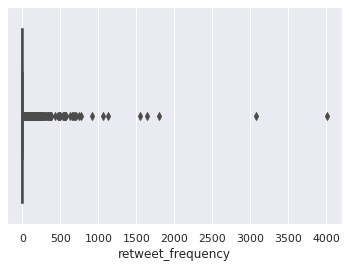

In [0]:
# Detecting outliers
sns.boxplot(x=df['retweet_frequency'])

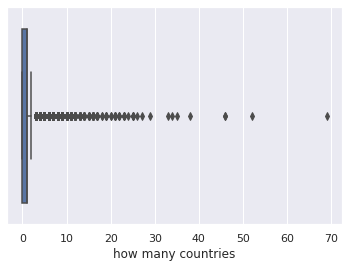

In [0]:
sns.boxplot(x=df['how many countries'])

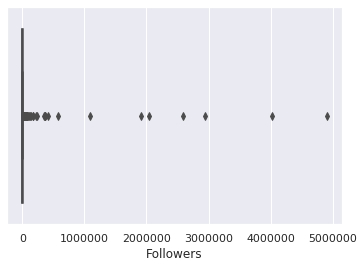

In [0]:
sns.boxplot(x=df['Followers'])
            

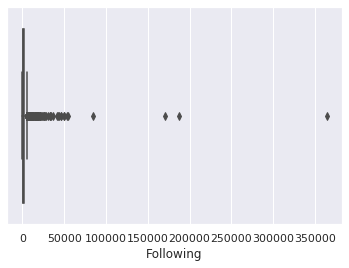

In [0]:
sns.boxplot(x=df['Following'])

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1
print(IQR)


Unnamed: 0            20931.5
retweet_frequency         2.0
how many countries        1.0
Posts                 50091.5
Followers              2135.0
Following              2095.5
dtype: float64


In [0]:
df = df[~((df < (Q1 – 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

SyntaxError: ignored